In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=3, linewidth=500, threshold=500, suppress=True, edgeitems=5)

%matplotlib ipympl

%load_ext autoreload
%autoreload 2

import sys
from scipy.integrate import quad
import subprocess

In [2]:
def plot_chebyshev(save=False):

    lmax = 2
    lam = np.linspace(0, lmax, 100)

    def h(lam):
        return np.exp(-3 * lam)

    def T(lam, k):
        
        if k == 0:
            return np.ones_like(lam)
        elif k == 1:
            return 2 * lam / lmax - 1
        
        return (4 * lam / lmax - 2) * T(lam, k-1) - T(lam, k-2)


    def c(k):
        return 2 / np.pi * quad(lambda theta: np.cos(k * theta) * h(lmax / 2 * (np.cos(theta) + 1)), 0, np.pi)[0]


    fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(6, 5.5))

    for k, ax in enumerate(axes.ravel()):
        
        ax.plot(lam, h(lam), ls='--', label='$g(\lambda)$')
        
        ax.plot(lam, 0.5 * c(0) + sum(c(kk) * T(lam, kk) for kk in range(1, k+2)), label='Approximation', alpha=0.8)

    plt.subplots_adjust(hspace=0.35)

    ax.set_yticks([0, 0.5, 1])

    axes[0, 0].legend()

    if save:

        plt.savefig('Cheb/cheby.pdf')

        subprocess.run(['pdfcrop', 'Cheb/cheby.pdf', 'Cheb/cheby.pdf'])

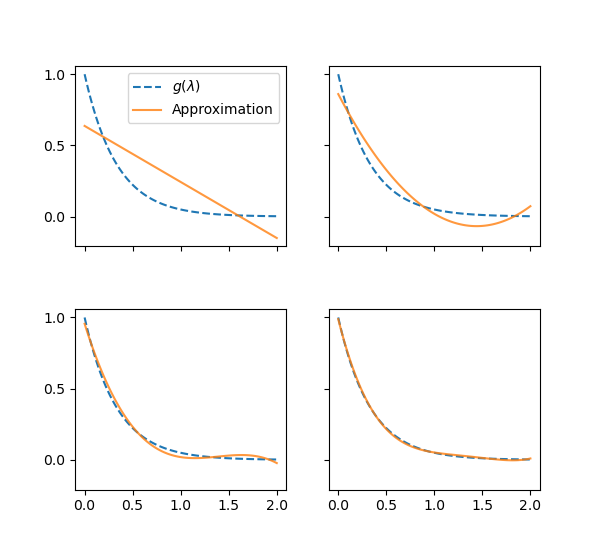

In [3]:
plot_chebyshev()